In [ ]:
## Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Read the given dataset

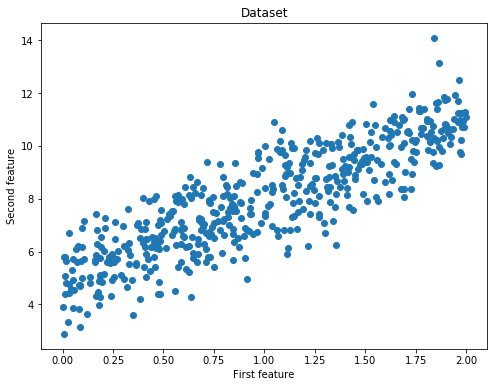

In [3]:
pima = pd.read_csv("diabetes.csv")

In [4]:
### Show the last 5 records of the dataset
pima.tail()

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [ ]:
### Show the first 5 records of the dataset
pima.head()

In [ ]:
### Find the dimension of the `pima` dataframe.
pima.ndim

In [ ]:
### Find the size of the `pima` dataframe.
pima.shape

In [ ]:
### Display the data types of all the variables in the data set.
pima.dtypes

In [ ]:
### Are there any missing values in the `pima` dataframe? 
pima.isnull().values.any()

In [ ]:
### Find the summary statistics for all variables except for  `'Outcome'` variable. 
pima.iloc[:,:(pima.columns.get_loc('Outcome'))].describe()

In [ ]:
### Plot the distribution plot for the variable `'BloodPressure'`. 
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

In [ ]:
### What is the `'BMI'` for the person having the highest `'Glucose'`?
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

In [ ]:
#### What is the mean of the variable `'BMI'`? 
#### What is the median of the variable `'BMI'`? 
#### What is the mode of the variable `'BMI'`?
#### Are the three measures of central tendency equal?
m1 = pima['BMI'].mean()  #Mean
print(m1)
m2 = pima['BMI'].median()  #Median
print(m2)
m3 = pima['BMI'].mode()[0]  #Mode
print(m3)

In [ ]:
### How many women's `'Glucose'` level is above the mean level of `'Glucose'`?
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

In [ ]:
### Create the pairplot for variables `'Glucose'`, `'SkinThickness'` and `'DiabetesPedigreeFunction'`. 
sns.pairplot(data=pima, vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

In [ ]:
### Plot the scatterplot between `'Glucose'` and `'Insulin'`. 
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

In [ ]:
### Plot the boxplot for the 'Age' variable
plt.boxplot(pima['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [ ]:
### Find and visualize the the correlation matrix
corr_matrix = pima.iloc[:,0:8].corr()
corr_matrix

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

In [ ]:
# display the plot
plt.show()

In [ ]:
## Model Training

### Split and scale the data

# Split the data into dependent and independent variables
y = pima.Outcome
x = pima.drop('Outcome', axis = 1)

In [ ]:
# Using StandarScaler scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [ ]:
# Splitting the data into train and test. Use test size as 15%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify=y,  random_state = 45)

In [ ]:
### Train a Logistic Regression Model. 

# import the model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression(max_iter=1000)

# fit the model on the train set
m = lr.fit(x_train, y_train)

# Predict on x_test
y_pred = m.predict(x_test)

# Evaluate the model
print('Accuracy of Logistic Regression model on the train set: {:.2f}'.format(m.score(x_train, y_train)))
print('Accuracy of the Logictic Regression model on the test set: {:.2f}'.format(m.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
### Train a Random Forest Model.

# Import the Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model. 
rf = RandomForestClassifier(n_estimators=301, max_depth=3)

# fit the model on the train set
m2 = rf.fit(x_train, y_train)

# Predict on x_test
y_pred2 = m2.predict(x_test)

# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(m2.score(x_train, y_train)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(m2.score(x_test, y_test)))
confusion_matrix(y_test, y_pred2)